In [ ]:
!pip install scikit-image matplotlib ipywidgets
!pip install ipympl

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


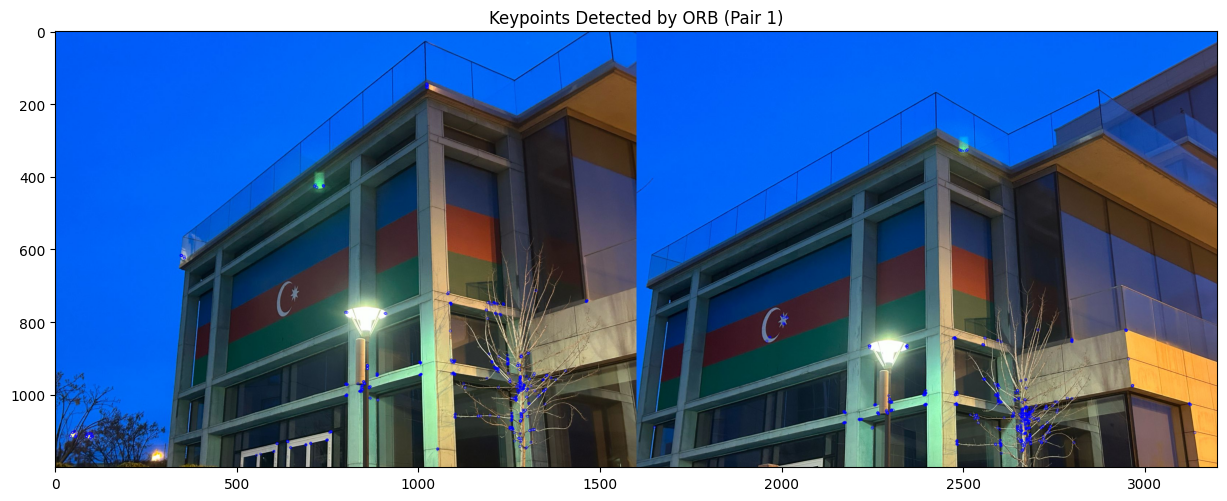

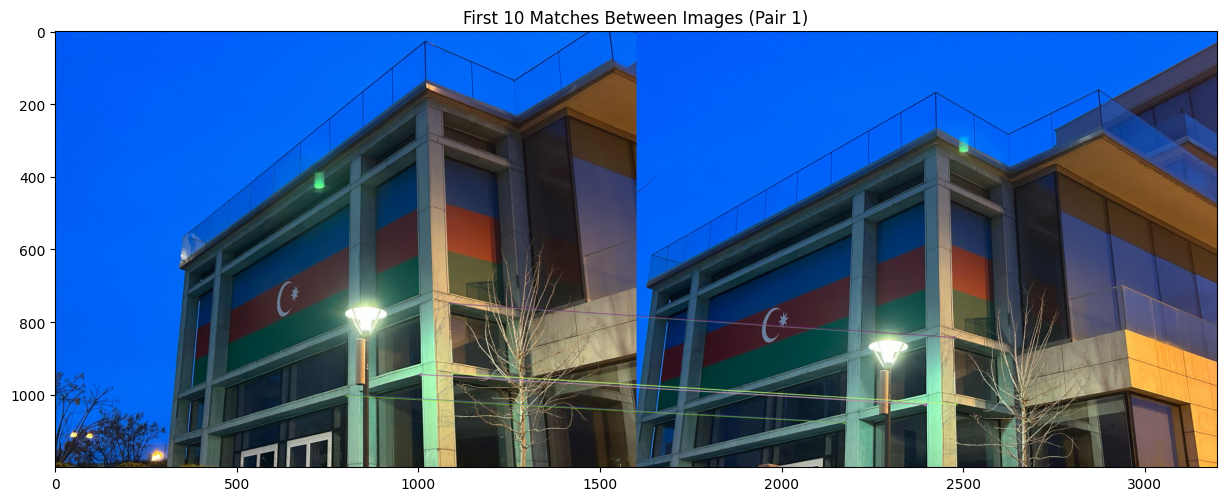

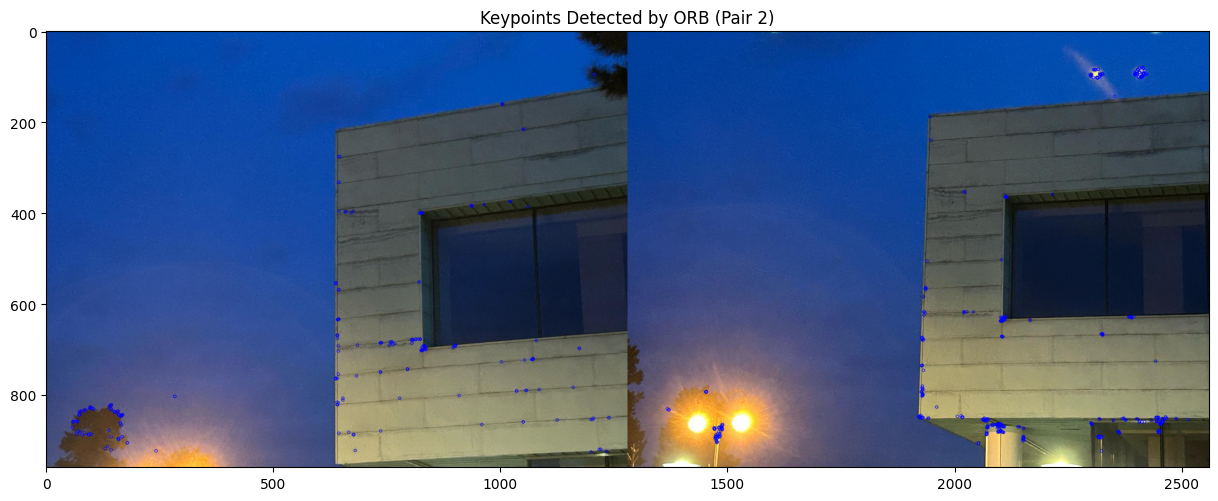

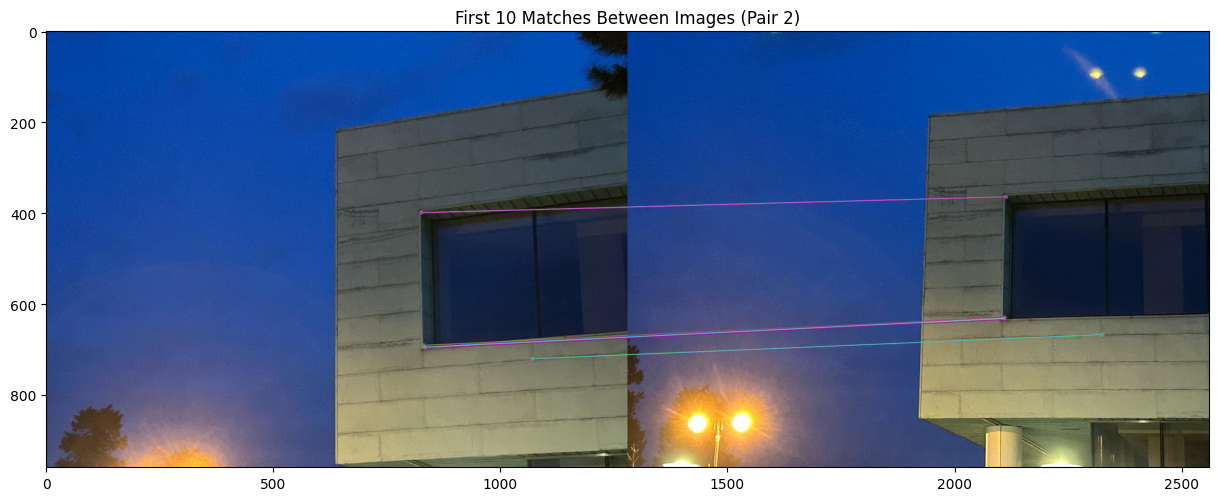

In [8]:
#@title Question 3: Interest Points
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from IPython.display import display
from PIL import Image
import os
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

def match_and_display(image1, image2, title_suffix=''):
    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find the keypoints and descriptors with ORB
    keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

    # Create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptors1, descriptors2)

    # Sort them in the order of their distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw first 10 matches
    matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], outImg=None, flags=2)

    # Draw keypoints on the images
    keypoint_image1 = cv2.drawKeypoints(image1, keypoints1, None, color=(255, 0, 0), flags=0)
    keypoint_image2 = cv2.drawKeypoints(image2, keypoints2, None, color=(255, 0, 0), flags=0)

    # Combine images horizontally
    combined_image = np.hstack((keypoint_image1, keypoint_image2))

    # Convert BGR to RGB for matplotlib
    combined_image_rgb = cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB)

    # Display the keypoints
    plt.figure(figsize=(15, 7))
    plt.imshow(combined_image_rgb)
    plt.title(f'Keypoints Detected by ORB {title_suffix}')
    plt.show()

    # Display the matched points
    plt.figure(figsize=(15, 7))
    matched_image_rgb = cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB)
    plt.imshow(matched_image_rgb)
    plt.title(f'First 10 Matches Between Images {title_suffix}')
    plt.show()

# Load the images for the first pair
image1a = cv2.imread('/content/drive/My Drive/a4-feature-extraction-tmehtiyev2019/input_photos/interest_points/1.jpeg')


image1b = cv2.imread('/content/drive/My Drive/a4-feature-extraction-tmehtiyev2019/input_photos/interest_points/2.jpeg')


# Match and display the first pair
match_and_display(image1a, image1b, title_suffix='(Pair 1)')

# Load the images for the second pair
image2a = cv2.imread('/content/drive/My Drive/a4-feature-extraction-tmehtiyev2019/input_photos/interest_points/15.jpeg')
image2b = cv2.imread('/content/drive/My Drive/a4-feature-extraction-tmehtiyev2019/input_photos/interest_points/16.jpeg')


# Match and display the second pair
match_and_display(image2a, image2b, title_suffix='(Pair 2)')
